In [1]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import pickle
import re
import PyQt5
import yaml
import os
import shutil
import glob
from clease.settings import Concentration
from clease.settings import CEBulk
from clease.structgen import NewStructures
from ase.db import connect
from ase.io import read, write
from ase.io.lammpsdata import read_lammps_data, write_lammps_data
from ase.visualize import view
from ase.calculators.eam import EAM
from clease.tools import update_db
from clease import Evaluate
from clease import NewStructures
from clease.calculator import attach_calculator
from clease.montecarlo import Montecarlo
from clease.montecarlo.observers import acceptance_rate
import clease

# from gpaw import GPAW
from ase.calculators.emt import EMT
import json

import clease.plot_post_process as pp
import matplotlib.pyplot as plt

In [19]:
atoms = []
for i in range(3):
    atoms.append(read("/Users/Michael_wang/Downloads/claudeMD" + str(i) + ".sdf"))
for i, atom in enumerate(atoms):
    write("/Users/Michael_wang/Downloads/claudeMD" + str(i) + ".pdb", atom)

In [21]:
atoms = read("/Users/Michael_wang/Downloads/tmpGPT.sdf")
view(atoms)

<Popen: returncode: None args: ['/Users/Michael_wang/opt/anaconda3/envs/casm...>

mach_inject_bundle load_bundle_package: /Library/Application Support/MacEnhance/Plugins/AfloatX.bundle


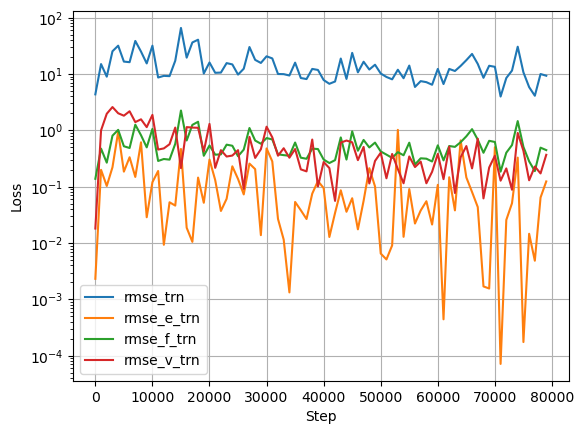

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("/Users/Michael_wang/Downloads/lcurve (1).out", names=True)
for name in data.dtype.names[1:-1]:
    plt.plot(data["step"][:80], data[name][:80], label=name)
plt.legend() 
plt.xlabel("Step")
plt.ylabel("Loss")
# plt.xscale("symlog")
plt.yscale("log")
plt.grid()
plt.show()

In [2]:
from clease.montecarlo.trial_move_generator import RandomTransition

In [3]:
A = ase_read("/Users/Michael_wang/Documents/venkat/mint-PD/PhaseDiagram-Clease/POSCAR")
view(A)

<Popen: returncode: None args: ['/Users/Michael_wang/opt/anaconda3/envs/casm...>

mach_inject_bundle load_bundle_package: /Library/Application Support/MacEnhance/Plugins/AfloatX.bundle


In [24]:
from typing import Tuple
tmp = [1,2,3]
tuple[tmp]

tuple[[1, 2, 3]]

In [ ]:

tmpMC = Montecarlo(tmp, temp=300, generator=RandomTransition)
obs = acceptance_rate(tmpMC)
tmpMC.attach(obs, 1)
tmpMC.run(1000)
obs.acceptance_rate


In [4]:
asdf = "Na12Li43NaNaNaLiNaLiLiNaLiNaLiLiLi"
pattern = r'[0-9]'
new_string = re.sub(pattern, '', asdf)
new_string

'NaLiNaNaNaLiNaLiLiNaLiNaLiLiLi'

In [22]:
from ase.io import read, write

data = read("/Users/Michael_wang/Documents/venkat/cleaseASEcalc/LiMg/bcc.db", index=':')
# data = read("/Users/Michael_wang/Documents/venkat/cleaseASEcalc/LiMg/hcp-NQP2-newInsert-ready.extxyz", index=':')
# data = read("/Users/Michael_wang/Documents/venkat/cleaseASEcalc/hcp-NQP2.extxyz", index=":")
write("/Users/Michael_wang/Documents/venkat/cleaseASEcalc/LiMg/bcc.extxyz", data)
pass

In [18]:
from ase.db import connect

db =  connect("LiMg/LiMg-Sep11-first-Batch-hcp-NQP-energy.db")
for row in db.select(""):
    atomssss = row.toatoms()
    print(atomssss.symbols)
    pass

Mg216
Mg109LiMg60LiMg14LiMg30
Mg26LiMg37LiMg24LiMg4LiMg67LiMg13LiMg39
Mg86LiMg26LiMg22LiMg11LiMg2LiMg6LiMg18LiMg10LiMgLiMg25
Mg41LiMg15LiMg53LiMg10LiMg20LiMg7LiMg12LiMg6LiMg7LiMg2LiMg5Li2Mg26
Mg6LiMg65LiMg17LiMgLiMg10LiMg4Li2Mg11LiMg15LiMg10LiMg3LiMg10LiMg24LiMg13LiMg6LiMg6
LiMgLiMg18LiMg17LiMg12LiMg17LiMg5LiMg2Li2Mg37LiMg12LiMg8LiMg8LiMg5LiMg25LiMg11Li2Mg2LiMg18
Mg2LiMg3LiMg4LiMg12LiMg12LiMg13LiMg2LiMg2LiMg14Li2MgLiMg6LiMg13LiMg10LiMgLiMg29Li2Mg32LiMg2LiMg19LiMg2LiMg16
Mg5LiMg2LiMg4LiMg51LiMg4LiMg4LiMgLiMgLiMg2LiMg4LiMg9LiMgLiMg2Li2Mg11LiMgLiMg16LiMg14LiMg8Li2Mg7LiMg17LiMg2LiMg11LiMg15
MgLiMg3Li3Mg4LiMg4Li2Mg5LiMg3LiMgLiMg10LiMg7LiMg21Li2MgLiMg13LiMg10Li2Mg23Li2Mg17LiMg18LiMg4LiMg4LiMg15Li2Mg3LiMg22
MgLiMg4LiMg28LiMg13LiMgLiMg7Li2Mg19LiMg5LiMg7LiMg4LiMg10LiMg2LiMg8LiMgLiMg2LiMg2LiMgLi4Mg9LiMg5LiMg5LiMgLi3Mg21LiMgLiMg28LiMg
Mg15Li2Mg5LiMg11LiMg13LiMg2LiMg2LiMg5LiMg6Li2Mg13LiMgLiMg4Li2Mg4LiMgLiMg10LiMg6LiMg7LiMg5LiMg12Li2MgLiMg26LiMg5LiMg3LiMg2LiMg4LiMg2LiMg6LiMg6LiMgLiMg5Li
Li2Mg4Li3Mg

In [7]:
!export KMP_DUPLICATE_LIB_OK=True
!nequip-train /Users/Michael_wang/Documents/venkat/cleaseASEcalc/minimal_eng.yaml

6348.73s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
6357.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


OMP: Error #15: Initializing libomp.dylib, but found libomp.dylib already initialized.
OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program. That is dangerous, since it can degrade performance or cause incorrect results. The best thing to do is to ensure that only a single OpenMP runtime is linked into the process, e.g. by avoiding static linking of the OpenMP runtime in any library. As an unsafe, unsupported, undocumented workaround you can set the environment variable KMP_DUPLICATE_LIB_OK=TRUE to allow the program to continue to execute, but that may cause crashes or silently produce incorrect results. For more information, please see http://openmp.llvm.org/


In [ ]:
%run /Users/Michael_wang/Documents/venkat/cleaseASEcalc/phb3.py

In [13]:
!pwd

/Users/Michael_wang/Documents/venkat/mint-PD/PhaseDiagram-Clease


In [14]:
A = []
B = []
with open("phbLog-lina-CLEASE-acc0.003-fine-64.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        tmp = line.split("\t")
        A.append(float(tmp[0]))
        B.append(float(tmp[1]))
A = 1-np.array(A)
B = 1-np.array(B)

Tinit, dT = 270, 2
ysEnd = (len(A)-1) * dT + Tinit
ys = np.linspace(Tinit, ysEnd, len(A), endpoint=True)
ys

array([270., 272., 274., 276., 278., 280., 282., 284., 286., 288., 290.,
       292., 294., 296., 298., 300., 302., 304., 306., 308., 310., 312.,
       314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334.,
       336., 338., 340., 342., 344., 346., 348., 350.])

In [18]:
BRefTmp = np.loadtxt("left.csv", delimiter=",", dtype=float)
BRefX = BRefTmp[:,0]
BRefY = BRefTmp[:,1]
BRef = np.array([[x,y] for y, x in sorted(zip(BRefY, BRefX))])
ARefTmp = np.loadtxt("right.csv", delimiter=",", dtype=float)
ARefX = ARefTmp[:,0]
ARefY = ARefTmp[:,1]
ARef = np.array([[x,y] for y, x in sorted(zip(ARefY, ARefX))])

In [36]:
BRefX

array([0.00543909, 0.00469768, 0.00489037, 0.00436537, 0.00433953,
       0.00381629, 0.00326034, 0.00223617, 0.00221033, 0.0021845 ,
       0.00223035, 0.00710071, 0.00654881])

In [35]:
BRef[:,1]

array([301.87598514, 307.51072813, 312.68575933, 317.86079053,
       323.03654203, 327.9296823 , 332.75223061, 337.92726181,
       343.10265316, 347.9717305 , 353.02966407, 358.08786337,
       361.11846944])

Text(0.5, 1.0, 'LiNa Solidus Phase Diagram')

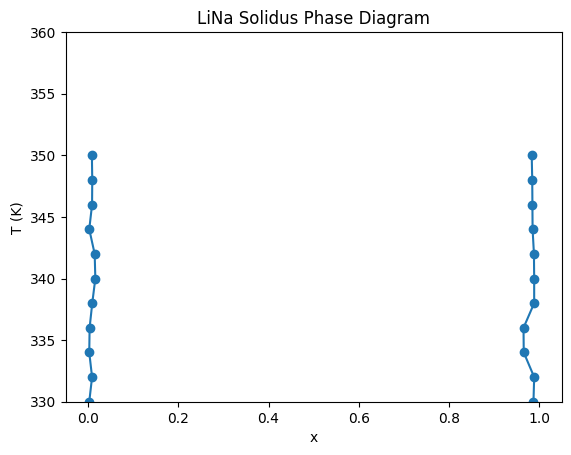

In [24]:
plt.plot(B, ys, '-o', c='tab:blue')
# plt.plot(BRef[:,0], BRef[:,1], c='tab:orange')
plt.plot(A, ys, '-o', c='tab:blue')
# plt.plot(ARef[:,0], ARef[:,1], c='tab:orange')
# plt.legend(["Simulation","FactSage"])
plt.xlabel("x")
plt.ylabel("T (K)")
plt.ylim([330,360])
plt.title("LiNa Solidus Phase Diagram")

Text(0.02, 0.5, 'T (K)')

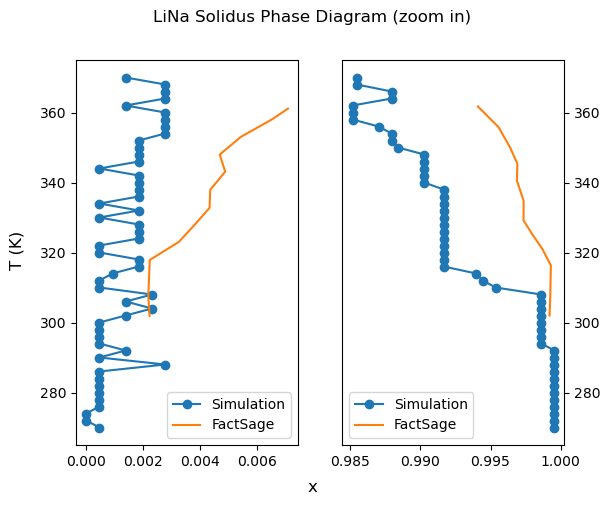

In [201]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.3,5))
pltStart, pltEnd = 0,-1
ax1.plot(B, ys, '-o')
ax1.plot(BRef[:,0], BRef[:,1])
ax1.legend(["Simulation","FactSage"])
# ax1.set_xlim([-0.001, 0.025])
ax2.yaxis.tick_right()
ax2.plot(A, ys, '-o')
ax2.plot(ARef[:,0], ARef[:,1])
ax2.legend(["Simulation","FactSage"], loc="lower left")
# ax2.set_xlim([1-0.025, 1+0.001])
fig.suptitle("LiNa Solidus Phase Diagram (zoom in)")
fig.supxlabel("x")
fig.supylabel("T (K)")

In [199]:
from ase.visualize import view
gs0_db_name = "LiNa/LiNa-64-0.0-EIM.db"
db = connect(gs0_db_name)
gs0 = None
for row in db.select(""):
    gs0 = row.toatoms()
    view(gs0)

mach_inject_bundle load_bundle_package: /Library/Application Support/MacEnhance/Plugins/AfloatX.bundle


In [43]:
AExp = []
for refY in ARefY:
    tmpIdx0 = np.argmin(np.abs(ys - refY))
    if ys[tmpIdx0] > refY:
        tmpIdx1 = tmpIdx0 - 1
    else:
        tmpIdx1 = tmpIdx0 + 1

    x2Append = A[tmpIdx0] + (A[tmpIdx1]-A[tmpIdx0]) * (refY - ys[tmpIdx0])/(ys[tmpIdx1] - ys[tmpIdx0])
    AExp.append(x2Append)

BExp = []
for refY in BRefY:
    tmpIdx0 = np.argmin(np.abs(ys - refY))
    if ys[tmpIdx0] > refY:
        tmpIdx1 = tmpIdx0 - 1
    else:
        tmpIdx1 = tmpIdx0 + 1

    x2Append = B[tmpIdx0] + (B[tmpIdx1]-B[tmpIdx0]) * (refY - ys[tmpIdx0])/(ys[tmpIdx1] - ys[tmpIdx0])
    BExp.append(x2Append)

MAEA = np.sum(np.abs(AExp - ARefX))/len(AExp)
MAEB = np.sum(np.abs(BExp - BRefX))/len(BExp)
print(MAEA, MAEB)

0.0018154083564174439 0.0036425572104482346


Text(0.5, 0, 'x')

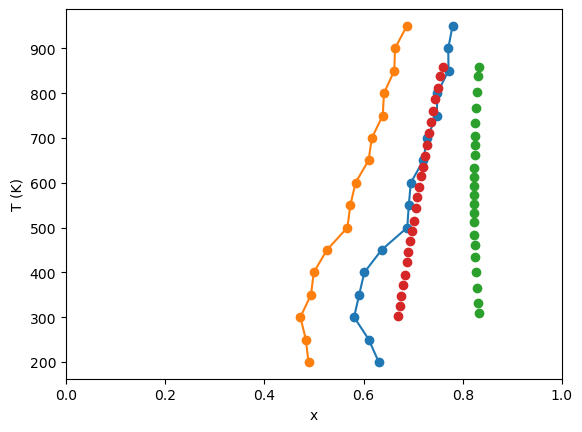

In [176]:
%matplotlib inline
pltStart, pltEnd = 0,-1
# pltStart, pltEnd = 0,-1
plt.plot(A[pltStart:pltEnd], ys[pltStart:pltEnd], "-o")
plt.plot(B[pltStart:pltEnd], ys[pltStart:pltEnd], "-o")
# plt.plot(AExp, ARefY, 'o')
# plt.plot(BExp, BRefY, 'o')

plt.plot(ARefX, ARefY, 'o')
# plt.plot(AExp, ARefY, 'o')
plt.plot(BRefX, BRefY, 'o')
plt.xlim([0,1])
plt.ylabel("T (K)")
plt.xlabel("x")

Text(0.5, 0, 'x')

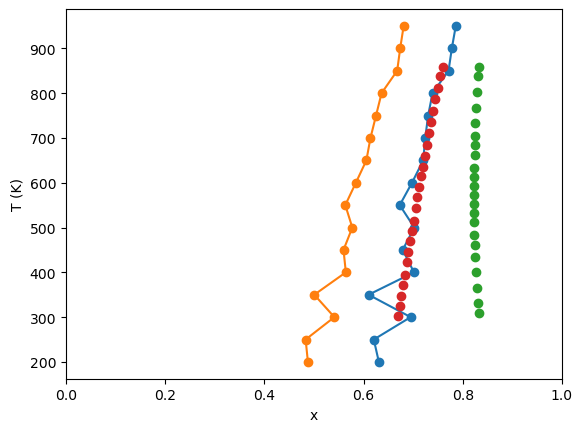

In [179]:
%matplotlib inline
pltStart, pltEnd = 0,-1
# pltStart, pltEnd = 0,-1
plt.plot(A[pltStart:pltEnd], ys[pltStart:pltEnd], "-o")
plt.plot(B[pltStart:pltEnd], ys[pltStart:pltEnd], "-o")
# plt.plot(AExp, ARefY, 'o')
# plt.plot(BExp, BRefY, 'o')

plt.plot(ARefX, ARefY, 'o')
# plt.plot(AExp, ARefY, 'o')
plt.plot(BRefX, BRefY, 'o')
plt.xlim([0,1])
plt.ylabel("T (K)")
plt.xlabel("x")

In [6]:







TInit, TFinal = 300,301
muInit, muFinal = -0.2,0.2
dT, dMu = 60, 0.02
TTs = np.arange(TInit, TFinal+1e-5, dT)
mus = np.arange(muInit, muFinal+dMu*1e-5, dMu)

a = np.load("300-900-phiTable-Mg.npy")
ax = np.load("300-900-XTable-Mg.npy")
ax = (ax + 1) / 2
b = np.flip(np.load("300-900-phiTable-Li.npy"), axis=1)
bx = np.flip(np.load("300-900-XTable-Li.npy"), axis=1)
bx = (bx + 1) / 2
totN = len(a)
totN

1

In [8]:
b[0]

array([-0.32068784, -0.30068829, -0.28068943, -0.26069097, -0.24069321,
       -0.2206949 , -0.20069592, -0.18069778, -0.16069955, -0.14070906,
       -0.12077191, -0.10128517, -0.08387025, -0.07050099, -0.06123357,
       -0.05506622, -0.05149147, -0.05034886, -0.0516692 , -0.05566277,
       -0.06284095, -0.07497621, -0.0922353 , -0.11181721, -0.13179737,
       -0.1517892 , -0.17179124, -0.19179097, -0.21179111, -0.23179227,
       -0.25179049, -0.27178772, -0.29178726, -0.31178629, -0.33178526,
       -0.35178376])

In [56]:
pd = np.array([[0.135, 0.045],
[0.131, 0.047],
[0.121, 0.030],
[0.123, 0.030],
[0.255, 0.096],
[0.336, 0.185],
[0.236, 0.075],
[0.022, 0.003],
[0.016, 0.003],
[0.013, 0.003],
[0.031, 0.003],
[0.016, 0.003],
[0.022, 0.003],
[0.016, 0.003],
[0.022, 0.003],
[0.037, 0.003],
[0.044, 0.003],
[0.105, 0.003],
[0.108, 0.003],
[0.180, 0.003],
[0.200, 0.003]])

pd = 1-np.flip(pd.T)
pd[0]

array([0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997,
       0.997, 0.997, 0.997, 0.997, 0.997, 0.925, 0.815, 0.904, 0.97 ,
       0.97 , 0.953, 0.955])

In [138]:
TTs

array([ 300.,  360.,  420.,  480.,  540.,  600.,  660.,  720.,  780.,
        840.,  900.,  960., 1020.])

[-0.06 -0.04]


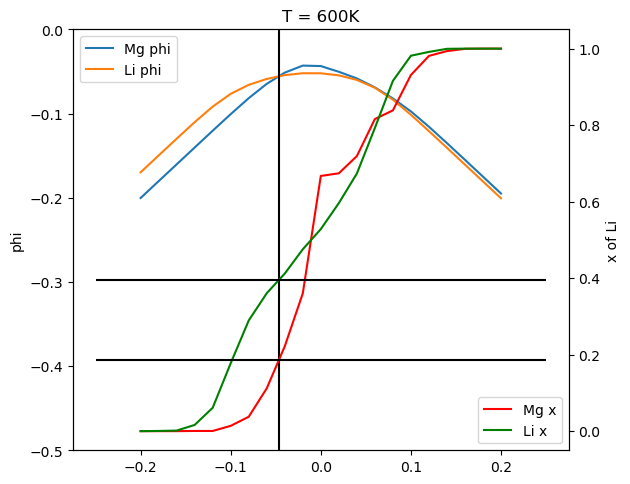

In [7]:
%matplotlib inline
aIntersections = []
bIntersections = []
for i in range(totN):

    fig, ax1 = plt.subplots()
    ax1.plot(mus, a[i], label="Mg phi")
    ax1.plot(mus, b[i], label="Li phi")
    ax1.legend(loc=2)
    ax1.set_ylim([-0.5,0])
    ax1.set_ylabel("phi")
    ax2 = ax1.twinx()
    ax2.plot(mus, ax[i], 'r', label="Mg x")
    ax2.plot(mus, bx[i], 'g', label="Li x")
    ax2.set_ylabel("x of Li")
    ax2.legend(loc=4)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    
    tmp = ((a[i] - b[i])>0)*2-1
    if np.all((tmp[1:]*tmp[:-1]) > 0):
        aIntersections.append(0)
        bIntersections.append(0)
        continue

    tmp = np.argmin(tmp[1:]*tmp[:-1])
    interPoint = [tmp, tmp+1]
    print(mus[interPoint])

    f1 = np.polyfit(mus[interPoint], a[i][interPoint], 1)
    f2 = np.polyfit(mus[interPoint], b[i][interPoint], 1)
    intersection = np.roots(f1 - f2)[0]

    ax1.vlines(intersection, -0.5, 0, "black", label="_nolegend_")


    tmp = ((mus - intersection)>0)*2-1
    tmp = np.argmin(tmp[1:]*tmp[:-1])
    interPoint = [tmp, tmp+1]

    z = np.polyfit(mus[interPoint], ax[i][interPoint], 1)
    p = np.poly1d(z)
    aIntersections.append(p(intersection))
    ax2.hlines(p(intersection), -0.25, 0.25, "black", label="_nolegend_")


    z = np.polyfit(mus[interPoint], bx[i][interPoint], 1)
    p = np.poly1d(z)
    bIntersections.append(p(intersection))
    ax2.hlines(p(intersection), -0.25, 0.25, "black", label="_nolegend_")

    plt.title("T = 600K")
    plt.xlabel("µ")
    # plt.legend()

    plt.show()


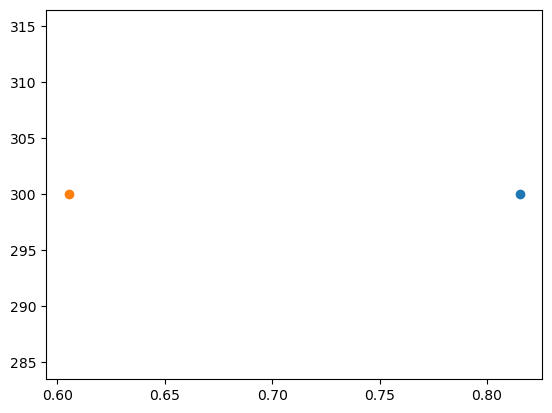

In [9]:
plt.figure()
plt.plot(1-np.array(aIntersections), TTs, 'o')
plt.plot(1-np.array(bIntersections), TTs, 'o')

plt.show()

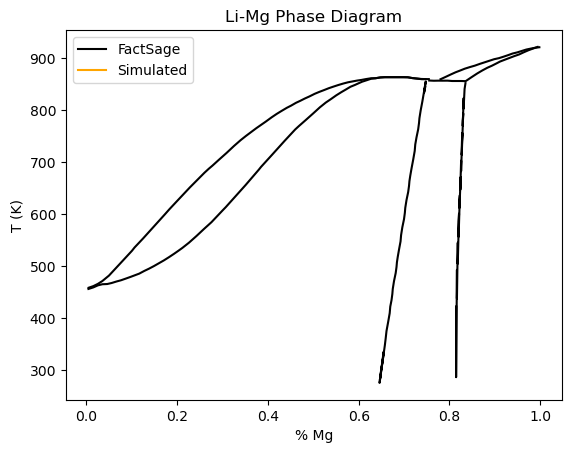

In [10]:
for i in range(7):
    RefTmp = np.loadtxt("REF/" + str(i) + ".csv", delimiter=",", dtype=float)
    RefX = RefTmp[:,0]
    RefY = RefTmp[:,1]
    Ref = np.array([[x,y] for y, x in sorted(zip(RefY, RefX))])
    if i < 6:
        plt.plot(RefX, RefY, 'black', label='_nolegend_')
    else:
        plt.plot(RefX, RefY, 'black', label="FactSage")

plt.plot(1-np.array(aIntersections)[:-3], TTs[:-3], 'orange', label='_nolegend_')
plt.plot(1-np.array(bIntersections)[:-3], TTs[:-3], 'orange', label="Simulated")
plt.legend()
plt.title("Li-Mg Phase Diagram")
plt.xlabel("% Mg")
plt.ylabel("T (K)")
# plt.plot(1-np.array(aIntersections), TTs, 'orange')
# plt.plot(1-np.array(bIntersections), TTs, 'orange')
plt.show()

In [113]:
%matplotlib qt
for i in range(totN):
   print(i)
   fig, ax1 = plt.subplots()
   ax1.plot(mus, a[i])
   ax1.plot(mus, b[i])
   
   ax2 = ax1.twinx()
   ax2.plot(mus, ax[i])
   ax2.plot(mus, bx[i])
   
   fig.tight_layout()  # otherwise the right y-label is slightly clipped
   plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


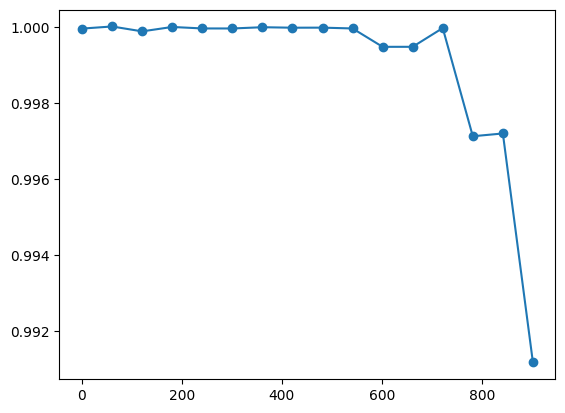

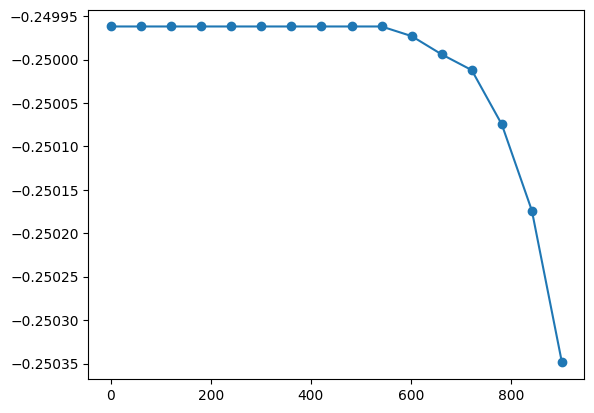

In [112]:
# %matplotlib inline
# TInit, TFinal = 300,900
# muInit, muFinal = -0.25,-0.01
# dT, dMu = 120, 10.01
# TTs = np.arange(TInit, TFinal+1e-5, dT)
# mus = np.arange(muInit, muFinal+dMu*1e-5, dMu)

# a = np.load("300-900-phiTable-Mg.npy")
# ax = np.load("300-900-XTable-Mg.npy")
# ax = (ax + 1) / 2
plt.figure()
plt.plot(TTs, bx[:,-1], '-o')
plt.figure()
plt.plot(TTs, b[:,-1], '-o')
plt.show()


In [72]:
a[:,0]

array([-0.14988333, -0.14988351, -0.1498837 , -0.14988389, -0.14988407,
       -0.14988426, -0.14988445, -0.14988463, -0.14988482, -0.149885  ,
       -0.14988519, -0.14988538, -0.14988556, -0.14988914, -0.1498949 ,
       -0.14990066, -0.14990734, -0.14991403, -0.14993572, -0.14996863,
       -0.15001508, -0.150084  , -0.15015712, -0.1502295 , -0.15030959,
       -0.14598314])

In [60]:
plt.plot(pd[0], TTs)
plt.plot(pd[1], TTs)
plt.xlim([0,1])
plt.show()

In [110]:
# %matplotlib inline
pltStart, pltEnd = 0,-1
# pltStart, pltEnd = 0,-1
plt.plot(A[pltStart:pltEnd], ys[pltStart:pltEnd], "-o")
plt.plot(B[pltStart:pltEnd], ys[pltStart:pltEnd], "-o")
# plt.plot(AExp, ARefY, 'o')
# plt.plot(BExp, BRefY, 'o')

plt.plot(ARefX, ARefY, 'o')
# plt.plot(AExp, ARefY, 'o')
plt.plot(BRefX, BRefY, 'o')
plt.xlim([0,1])
plt.ylabel("T (K)")
plt.xlabel("x")

NameError: name 'A' is not defined

In [21]:
f = open("asdfasdfasdf.txt", 'a')

for i in range(5):
    f.writelines(str(i)+'\t')

f.close()

In [241]:
tmp = np.arange(10)
curr_corr_len = 3
a = np.roll(tmp, curr_corr_len)[curr_corr_len:]
print(a*tmp[curr_corr_len:])
print(tmp[:])

[ 0  4 10 18 28 40 54]
[]


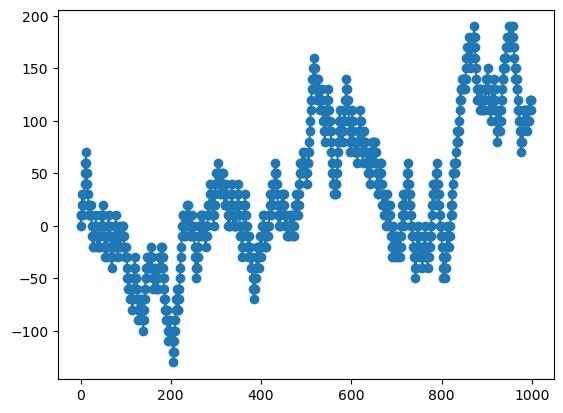

In [256]:
# N = int(1e5)
# x = np.linspace(0, 9, N)
# y_raw = -100*x
# noises = np.random.random(N)*10 #* x
# y = y_raw + noises

# plt.plot(x, y, '-o')
# plt.plot(x, y_raw)
# plt.plot(x, x + x*10)
# plt.show()

N = int(1000)
y = []
y.append(10)
for i in range(N-1):
    tmp = np.random.rand()
    if tmp > 0.5:
        y.append(y[i] + 10)
    if tmp < 0.5:
        y.append(y[i] - 10)

plt.plot(y, '-o')
plt.show()

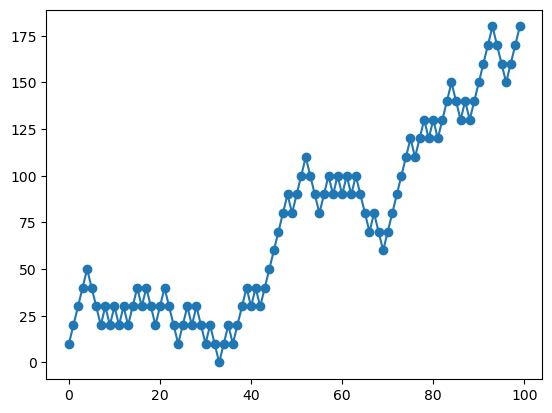

/var/folders/k_/jq6m6ps14v59j7zn4tqygzjr0000gn/T/ipykernel_1581/32826206.py:27: RuntimeWarning: Degrees of freedom <= 0 for slice
  V.append(np.cov(qt, qs)[0, 1])


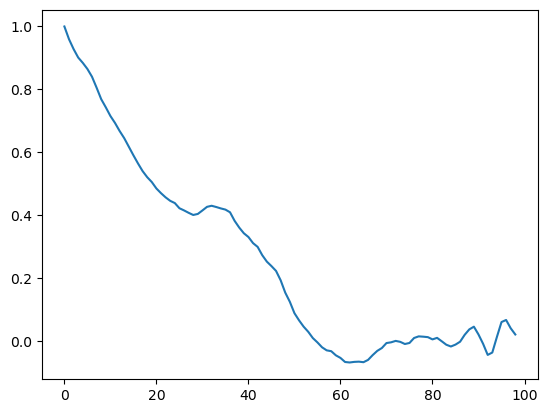

In [267]:
%matplotlib qt
N = int(100)
y = []
y.append(10)
for i in range(N-1):
    tmp = np.random.rand()
    if tmp > 0.5:
        y.append(y[i] + 10)
    if tmp < 0.5:
        y.append(y[i] - 10)

plt.plot(y, '-o')
plt.show()

i=0
l = 0
# width = 2000
V = []
iS = []

for l in range(len(y) - l - i):
    if l == 0:
        qt = y
    else:
        qt = y[:-l]
    qs = y[l:]
    V.append(np.cov(qt, qs)[0, 1])
    iS.append(l)

V = np.array(V)
plt.plot(iS, (V/V[0]))

# VAvg.append(np.mean(V[1:]/V[0]))

# plt.plot(iS, V/V[0])
# plt.plot(widths, VAvg)
plt.show()

# print(qt)
# print(qs)
# print(V0, V, V/V0)

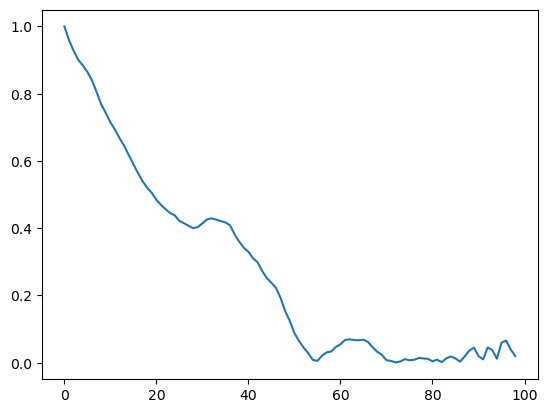

In [268]:
plt.plot(iS, abs(V/V[0]))

In [269]:
np.save("test_y.npy", y)

In [168]:
xBar = np.mean(x)
yBar = np.mean(y)
a = (x - xBar)
b = (y - yBar)
sum = 0
for aa, bb in zip(a, b):
    sum += aa * bb

cov = sum/N
cov

-67.98288814479402

In [169]:
varX = np.sum(np.square(x - xBar))/N
varY = np.sum(np.square(y - yBar))/N
np.sqrt(varX*varY)

68.39743580089906

In [171]:
cov/np.sqrt(varX*varY)

-0.9939391345413625

In [11]:
aRef = np.load("ref-TI1000-phiTable-0.0.npy")
cRef = np.load("ref-TI-phiTable-0.0.npy")
bRef = np.load("ref-phiTable-0.0.npy")
bRef[-7,0] = -14.344
# bRef = np.flip(np.load("ref-phiTable-1.0.npy"), axis=1)
# aRef2 = np.load("ref2-phiTable-0.0.npy")
# bRef2 = np.flip(np.load("ref2-phiTable-1.0.npy"), axis=1)

In [8]:
a = [1,2,3,4]
print(1, "\t", 2)

1 	 2


In [13]:
%matplotlib qt
plt.plot(aRef, '-o')
plt.plot(cRef, '-o')
plt.plot(bRef, '-o')
# plt.ylim([-15, -13])
# plt.plot(bRef2)

In [8]:
bx

array([[ 0.29797347,  0.28797347,  0.27797347,  0.26797347,  0.25797347,
         0.24797347,  0.23797347,  0.22797347,  0.21797347,  0.20797347,
         0.19797347,  0.18797347,  0.17797347,  0.16797347,  0.15797347,
         0.14797347,  0.13797347,  0.12797347,  0.11797347,  0.10797347,
         0.09797347,  0.08797347,  0.07797347,  0.06797347,  0.05797347,
         0.04797347,  0.03797347,  0.02797347,  0.01797347,  0.00797347,
        -0.00202653, -0.01202653, -0.02202653, -0.03202653, -0.04202653,
        -0.05202653, -0.06202653, -0.07202653, -0.08202653, -0.09202653,
        -0.10202653, -0.11202653, -0.12202653, -0.13202653, -0.14202653,
        -0.15202653, -0.16202653, -0.17202653, -0.18202653, -0.19202653,
        -0.20202653]])

In [64]:
a

array([ 9.99933140e-01,  1.00002794e+00,  9.98438543e-01,  9.88253620e-01,
        9.36332859e-01,  8.26452456e-01,  7.14593407e-01,  5.59876156e-01,
        3.63202577e-01,  1.34926116e-01,  1.25023339e-02,  8.53448874e-04,
       -5.23071558e-05,  2.60809539e-05])

In [84]:
%matplotlib qt

a = np.load("lina-XTable-g-M.npy")
a = a[0]
aCrit = int(a[0])
a[0] = 0
# ax = np.load("lina-muTable-g-L.npy")
b = np.flip(np.load("lina-XTable-g-L.npy"), axis=1)
b = b[0]
bCrit = int(-(b[-1]-1))
b[-1] = 1

c = np.load("new-300-lina-XTable-g-L.npy")
c = c[0]
# ax = np.load("lina-muTable-g-L.npy")
d = np.flip(np.load("new-300-lina-XTable-g-M.npy"), axis=1)
d = d[0]
# b = np.append(b[0], [0,0], axis=0)
# bx = np.flip(np.load("lina-muTable-g-M.npy"), axis=1)

TInit, TFinal = 3e3, 3e5
muInit, muFinal = -.1, .35
dT, dMu = 3000, .005
TTs = np.arange(TInit, TFinal+1e-5, dT)
mus = np.arange(muInit, muFinal+dMu*1e-5, dMu)

# plt.plot(ax[0], 1-a[0],'-o')
# plt.plot(bx[0], 1-b[0],'-o')
plt.plot(mus, 1-a,'-o')
plt.plot(mus, 1-b,'-o')
plt.vlines(mus[aCrit], 0, 1)
plt.vlines(mus[bCrit], 0, 1)
# plt.plot(mus, 1-c,'-o')
# plt.plot(mus, 1-d,'-o')
plt.legend(["a", 'b'])
plt.xlabel("μ")
plt.ylabel("x")

# plt.legend([str(a) for a in range(5)])

# aRef = np.load("ref-phiTable-0.0.npy")
# bRef = np.flip(np.load("ref-phiTable-1.0.npy"), axis=1)
# aRef2 = np.load("ref2-phiTable-0.0.npy")
# bRef2 = np.flip(np.load("ref2-phiTable-1.0.npy"), axis=1)

# TInit, TFinal = 3e3, 3e5
# dT = 3000
# TTs = np.arange(TInit, TFinal+1e-5, dT)

# for i, t in enumerate(TTs):
#     a[i] = a[i] - (aRef[i, 0] - aRef2[i, 0])
#     b[i] = b[i] - (bRef[i, 0] - bRef2[i, 0])

# np.save("toy-phiTable-0.0-MF.npy", a)
# np.save("toy-phiTable-1.0-MF.npy", b)

Text(0, 0.5, 'x')

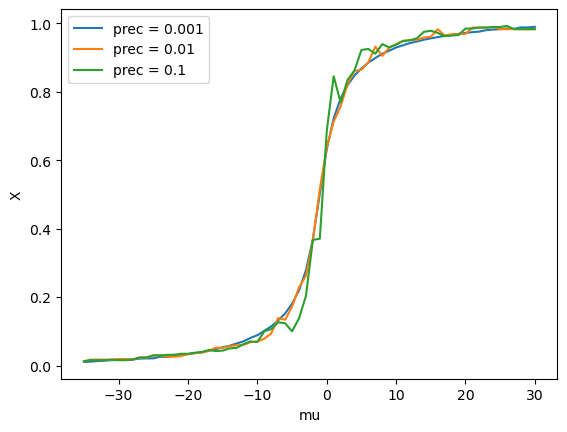

In [32]:
%matplotlib inline
a = np.load("toy-3.2-XTable-0.0.npy")
b = np.load("toy-3.2rougher-XTable-0.0.npy")
c = np.load("toy-3.2roughest-XTable-0.0.npy")
# c = np.flip(np.load("toy-1-XTable-1.0.npy"), axis=1)

# a = np.load("toy-phiTable-0.0-LTE.npy")
# b = np.load("toy-phiTable-0.0-MF.npy")
# c = np.flip(np.load("toy-1-XTable-1.0.npy"), axis=1)


TInit, TFinal = 3e3, 3e5
muInit, muFinal = -.175, .175
dT, dMu = 3000, 0.01
TTs = np.arange(TInit, TFinal+1e-5, dT)
mus = np.arange(muInit, muFinal+dMu*1e-5, dMu)

plt.plot(mus, a[0])
plt.plot(mus, b[0])
plt.plot(mus, c[0])

plt.xlabel("mu")
plt.ylabel("X")
plt.legend(["prec = 0.001", "prec = 0.01", "prec = 0.1"])


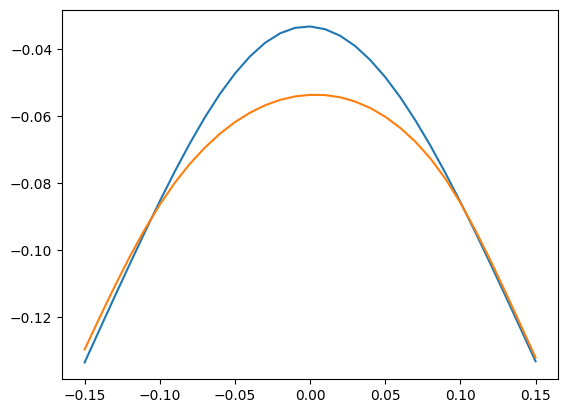

In [11]:
%matplotlib inline

# # aLTE = np.load("toy-phiTable-0.0-LTE.npy")
a = np.load("phiTable-Mg.npy")
# aTmp = np.load("tmp-phiTable-0.0.npy")
# achemPot = np.load("chemPot-h1j5-phiTable-0.0.npy")
# # a = a - 1
b = np.flip(np.load("phiTable-Li.npy"), axis=1)
# b = b + 2
# bTmp = np.flip(np.load("tmp-phiTable-1.0.npy"), axis=1)
# bchemPot = np.flip(np.load("chemPot-h1j5-phiTable-1.0.npy"), axis=1)
# ax = np.load("toy-XTable-0.0.npy")
# bx = np.flip(np.load("toy-XTable-1.0.npy"), axis=1)

# aRef = np.load("ref-phiTable-0.0.npy")
# aRef = aRef - 2
# bRef = np.flip(np.load("ref-phiTable-1.0.npy"), axis=1)

TInit, TFinal = 1,101
muInit, muFinal = -0.15,0.15
dT, dMu = 10, 0.01
TTs = np.arange(TInit, TFinal+1e-5, dT)
mus = np.arange(muInit, muFinal+dMu*1e-5, dMu)

# plt.plot(TTs, aRef[:, 0], 'o-')
# plt.plot(TTs, bRef[:, 0])
plt.plot(mus, a[19])
plt.plot(mus, b[19])
plt.show()

In [3]:
%matplotlib qt
FFFmus, FFFTs = np.meshgrid(mus, TTs[1:])
# Z = Ts + mus

# a = a + mus*x

print(a.shape)
print(b.shape)
# print(Ts.shape)
# print(mus.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(FFFTs, FFFmus, a[1:,:], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(FFFTs, FFFmus, b[1:,:], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

(100, 66)
(100, 66)


mach_inject_bundle load_bundle_package: /Library/Application Support/MacEnhance/Plugins/AfloatX.bundle


In [4]:
%matplotlib inline

In [26]:
%matplotlib inline
a = np.load("aucu-phiTable-2550-0.25.npy")
ax = np.load("aucu-XTable-2550-0.25.npy")
b = np.flip(np.load("aucu-phiTable-2550-0.50.npy"))
bx = np.flip(np.load("aucu-XTable-2550-0.50.npy"))

avg0 = np.average(a)
avg1 = np.average(b)
print(avg0, avg1)
a = a - (avg0 - avg1)

TInit, TFinal = 100, 200
muInit, muFinal =  -.12, .12
dT, dMu = 25, 0.0025
TTs = np.arange(TInit, TFinal+1e-5, dT)
mus = np.arange(muInit, muFinal+dMu*1e-5, dMu)


# ax.plot(mus, x0[0])
for i in range(5):
    fig,axes = plt.subplots()
    axes.plot(mus, a[i])
    axes.plot(mus, b[i])
# ax.plot(x0[0]-x1[0])
# plt.plot(x0[0])
plt.show()

-0.005295898371918255 -0.013829720261825799


In [25]:
pickle.dump(fig, open('0025-0.00.pickle', 'wb'))

In [2]:
%matplotlib qt
import pickle
figx = pickle.load(open('0025-0.00.pickle', 'rb'))
figx.show()

mach_inject_bundle load_bundle_package: /Library/Application Support/MacEnhance/Plugins/AfloatX.bundle


In [28]:
x0 = np.load("asdf-aucu-phiTable-0025-0.00.npy")
plt.figure()
plt.plot(x0[0])
plt.show()

In [19]:
def fill_gaps(a, radi = 1, empty = np.inf):
    for i in range(len(a)-1):
        tmpLs = []
        tmpLs.append(a[i])
        j = 1
        while j < radi + 2:
            if i + j > len(a) - 1:
                break
            tmpLs.append(a[i+j])
            if a[i+j] != np.inf:
                break
            j += 1
        if len(tmpLs) > 2 and tmpLs[0] != empty and tmpLs[-1] != empty:
            toFills = np.linspace(tmpLs[0], tmpLs[-1], len(tmpLs), endpoint=True)
            for idx, toFill in enumerate(toFills):
                a[i+idx] = toFill

# test = np.arange(10, dtype=float)
# test[3] = np.nan
# test[4] = np.nan
# test[5] = np.nan
# test[8] = np.nan
# print(test)
# fill_gaps(test, 3)
# print(test)

In [21]:
def com_tangent(a, b, percent = 20, radi = 1):
    tmp1 = a[:int(len(a)*percent/100)]
    tmp2 = b[:int(len(a)*percent/100)]
    if np.average(tmp1[tmp1 != np.inf]) - np.average(tmp2[tmp2 != np.inf]) > 0:
        tmp = b.copy()
        b = a
        a = tmp

    firstHalf = a[:int(len(a)*percent/100)]
    secondHalf = b[-int(len(a)*percent/100):]

    Loss = np.zeros((len(firstHalf), len(secondHalf)))
    Loss.fill(np.inf)

    for aIdx, aValue in enumerate(firstHalf):
        if aIdx < radi or aIdx + radi >= len(Loss) or aValue + a[aIdx - 1] + a[aIdx + 1]  == np.inf:
                continue
        prevA = a[aIdx - 1]
        aftA = a[aIdx + 1]
        for fakeBIdx, bValue in enumerate(secondHalf):
            bIdx = fakeBIdx + len(a) - int(len(a)*percent/100)
            if fakeBIdx < radi or bIdx + radi >= len(b) or bValue + b[bIdx - 1] + b[bIdx + 1]  == np.inf:
                continue
            slope = (bValue - aValue)/(bIdx - aIdx)
            inter = aValue - slope * aIdx
            prevB = b[bIdx - 1]
            aftB = b[bIdx + 1]

            Loss[aIdx, fakeBIdx] = abs((aIdx - 1) * slope  + inter - prevA) + \
                abs((aIdx + 1) * slope + inter - aftA) + \
                abs((bIdx - 1) * slope + inter - prevB) + \
                abs((bIdx + 1) * slope + inter - aftB)
            
    if Loss.min() != np.inf:
        x1, x2 = np.unravel_index(Loss.argmin(), Loss.shape)
        return x1, x2 + len(a) - int(len(a)*percent/100), firstHalf[x1], secondHalf[x2]
    

    for aIdx, aValue in enumerate(firstHalf):
        AnoTangent = False
        if aValue == np.inf:
                continue
        if aIdx < radi or aIdx + radi >= len(Loss) or aValue + a[aIdx - 1] + a[aIdx + 1]  == np.inf:
             AnoTangent = True
        else:
            prevA = a[aIdx - 1]
            aftA = a[aIdx + 1]

        for fakeBIdx, bValue in enumerate(secondHalf):
            BnoTangent = False
            if bValue == np.inf:
                continue
            bIdx = fakeBIdx + len(a) - int(len(a)*percent/100)
            if fakeBIdx < radi or bIdx + radi >= len(b) or bValue + b[bIdx - 1] + b[bIdx + 1]  == np.inf:
                BnoTangent = True
            else:
                prevB = b[bIdx - 1]
                aftB = b[bIdx + 1]
            if AnoTangent and BnoTangent:
                 continue
            slope = (bValue - aValue)/(bIdx - aIdx)
            inter = aValue - slope * aIdx

            if AnoTangent:
                Loss[aIdx, fakeBIdx] = abs((bIdx - 1) * slope + inter - prevB) + \
                    abs((bIdx + 1) * slope + inter - aftB)
            if BnoTangent:
                Loss[aIdx, fakeBIdx] = abs((aIdx - 1) * slope  + inter - prevA) + \
                    abs((aIdx + 1) * slope + inter - aftA)

    if Loss.min() != np.inf:
        x1, x2 = np.unravel_index(Loss.argmin(), Loss.shape)
        return x1, x2 + len(a) - int(len(a)*percent/100), firstHalf[x1], secondHalf[x2]
    
    return 0, len(b) - 1, firstHalf[0], secondHalf[-1]
    
    
            

# a = np.zeros(15)
# a.fill(np.inf)
# b = np.zeros(15)
# b.fill(np.inf)
# a[:5] = [-1, -4, -4, -3, 1]
# b[-5:] = [5, 2, 2, 3, 10]

# x1, x2 = com_tangent(a, b, percent=34)
# plt.plot(a)
# plt.plot(b)
# plt.plot([x1, x2], [a[x1], b[x2]], 'o')

###########

# tmpX = np.linspace(-1,1,100)
# tmpY1 = 0.5*tmpX-tmpX**2+tmpX**4
# tmpY1[20:80] = np.inf
# tmpY2 = -0.3*tmpX-tmpX**2+tmpX**4 +0.5
# tmpY2[20:-1] = np.inf

# x1, x2, y1, y2 = com_tangent(tmpY2, tmpY1, percent=40)
# plt.plot(tmpY1)
# plt.plot(tmpY2)
# # plt.plot([2*x1 - x2, 2*x2 - x1], [2*tmpY1[x1] - tmpY2[x2], 2*tmpY2[x2] - tmpY1[x1]], '-o')
# plt.plot([x1,x2], [y1,y2], 'o-')
# plt.xlim([-1, 101])
# plt.show()


In [22]:
xs = np.linspace(0, 1, 201, endpoint=True)

musATX = np.zeros((len(TTs), len(xs)-1))
musATX.fill(np.inf)

musBTX = np.zeros((len(TTs), len(xs)-1))
musBTX.fill(np.inf)

phiA = np.zeros((len(TTs), len(xs)-1))
phiA.fill(np.inf)

phiB = np.zeros((len(TTs), len(xs)-1))
phiB.fill(np.inf)

print(TTs.shape)
print(b.shape)

for i in range(len(TTs)):
    xidx = np.digitize(ax[i], xs)
    for j in range(1, len(xs)):
        # find out at what mus, the system has concentration == j, where 0 ≤ j ≤ 1
        tmp = mus[xidx == j]
        # if there is some mu
        if len(tmp):
            if j > len(xs)/2:
                musATX[i,j-1] = np.min(mus[xidx == j])
            else:
                musATX[i,j-1] = np.max(mus[xidx == j])
    # fill_gaps(musATX[i], 3)

for i in range(len(TTs)):
    xidx = np.digitize(bx[i], xs)
    for j in range(1, len(xs)):
        tmp = mus[xidx == j]
        if len(tmp):
            if j > len(xs)/2:
                musBTX[i,j-1] = np.min(mus[xidx == j])
            else:
                musBTX[i,j-1] = np.max(mus[xidx == j])
    # fill_gaps(musBTX[i], 3)

# for a given T, and X, look for corresponding mu from mu(T,X), 8
# and then look for corresponding phi, using the resulting mu
for i in range(len(TTs)):
    for j in range(len(xs)-1):
        tmp = musATX[i,j]
        if musATX[i,j] != np.inf:
            phiA[i,j] = np.average(a[i, mus==musATX[i,j]])

for i in range(len(TTs)):
    for j in range(len(xs)-1):
        tmp = musBTX[i,j]
        if musBTX[i,j] != np.inf:
            phiB[i,j] = np.average(b[i, mus==musBTX[i,j]])

for i in range(len(TTs)):
    fill_gaps(musATX[i], 10)
    fill_gaps(musBTX[i], 10)
    fill_gaps(phiA[i], 10)
    fill_gaps(phiB[i], 10)

print(1)
# for i in range(len(TTs)):
#     xidx = np.digitize(a[i], xs)
#     for j in range(1, len(xs)):
#         tmp = mus[xidx == j]
#         if len(tmp):
#             if j > len(xs)/2:
#                 phiA[i,j-1] = np.min(a[xidx == j])
#             else:
#                 phiA[i,j-1] = np.max(a[xidx == j])
#     fill_gaps(phiA[i], 3)

# for i in range(len(TTs)):
#     xidx = np.digitize(b[i], xs)
#     for j in range(1, len(xs)):
#         tmp = mus[xidx == j]
#         if len(tmp):
#             if j > len(xs)/2:
#                 musBTX[i,j-1] = np.min(mus[xidx == j])
#             else:
#                 musBTX[i,j-1] = np.max(mus[xidx == j])
#     fill_gaps(musBTX[i], 3)


# # finalCs = np.zeros((xs.shape[0], 50))
# # xBins = np.linspace(0.5, 0.75, 51)
# # for i, x in enumerate(xs):
# #     xIdx = np.digitize(x, xBins)
# #     for j in range(1, len(xBins)):
# #         finalCs[-(i+1)][j-1] = np.average(cs[i][xIdx == j])


(100,)
(100, 66)
1


<Figure size 640x480 with 0 Axes>

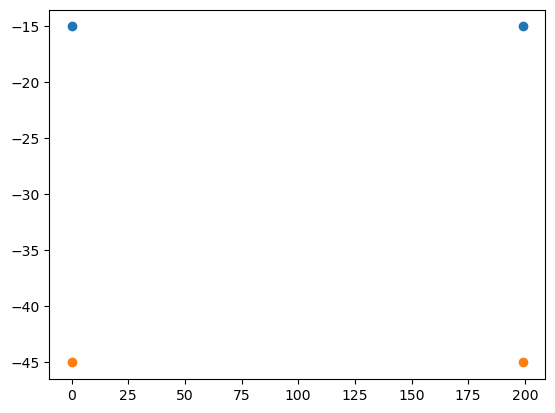

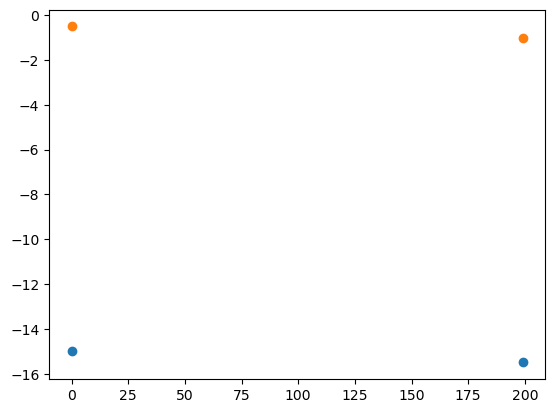

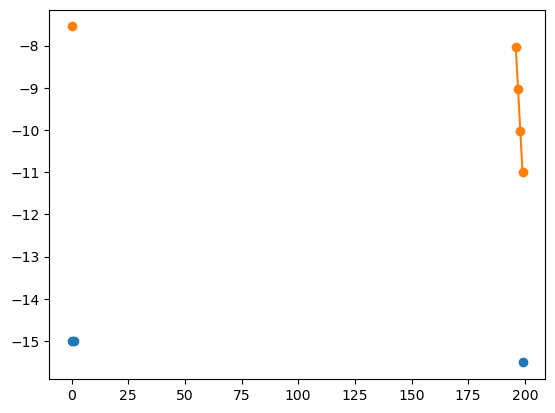

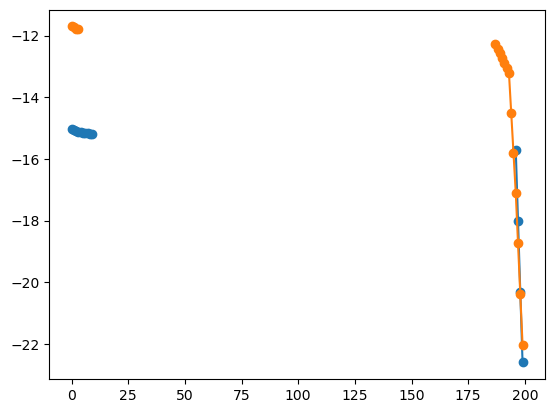

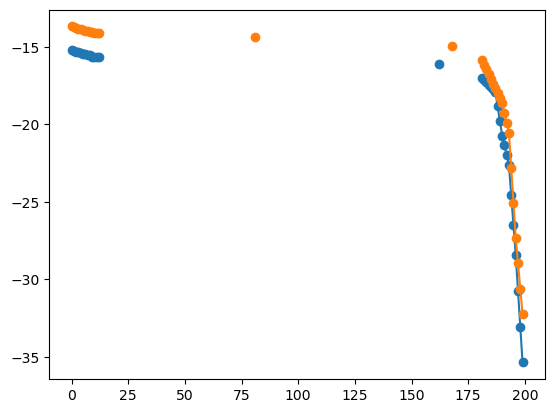

In [25]:

plt.figure()
for i in range(5):
    plt.figure()
    plt.plot(phiA[i*19], 'o-')
    plt.plot(phiB[i*19], 'o-')
plt.show()
# pass

/var/folders/k_/jq6m6ps14v59j7zn4tqygzjr0000gn/T/ipykernel_35399/3649409797.py:2: RuntimeWarning: invalid value encountered in multiply
  phiAPlot = phiA + musATX * xs[:-1]
/var/folders/k_/jq6m6ps14v59j7zn4tqygzjr0000gn/T/ipykernel_35399/3649409797.py:3: RuntimeWarning: invalid value encountered in multiply
  phiBPlot = phiB + musBTX * xs[:-1]


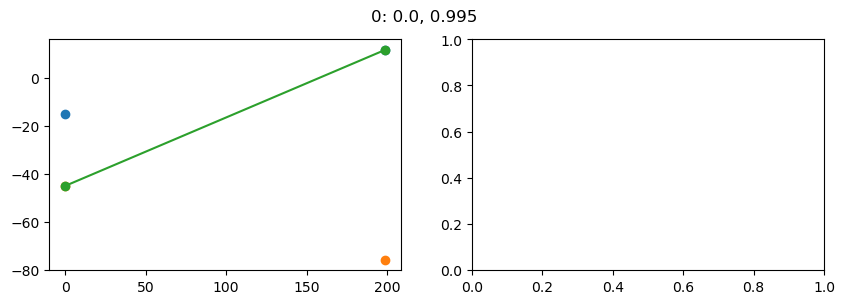

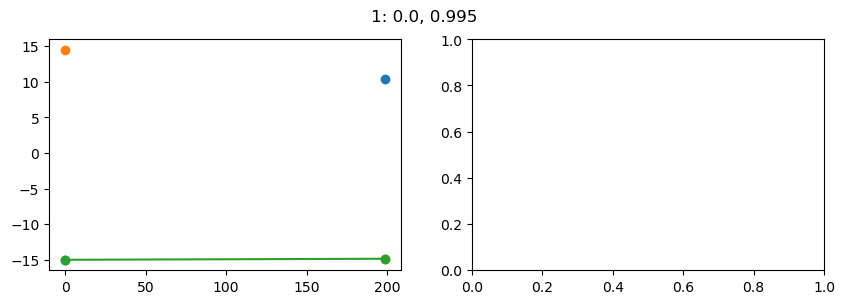

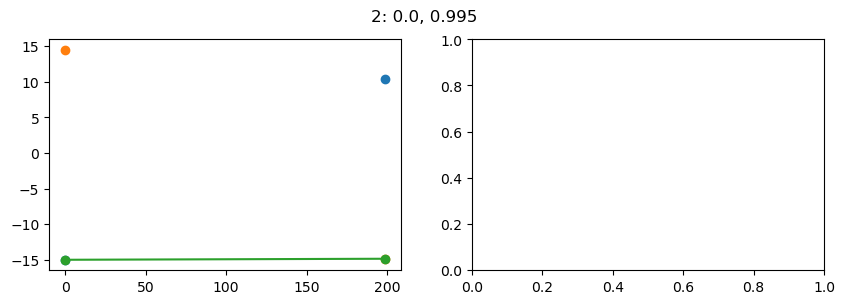

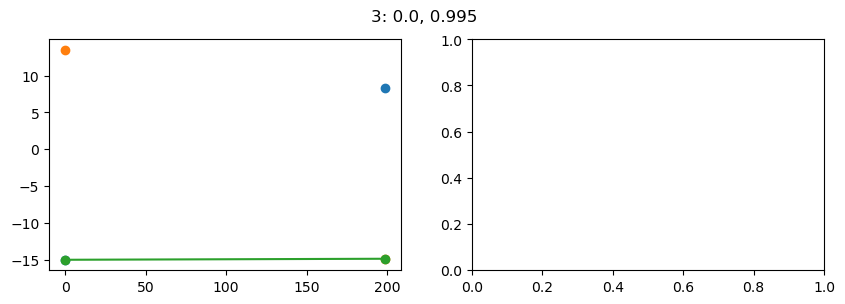

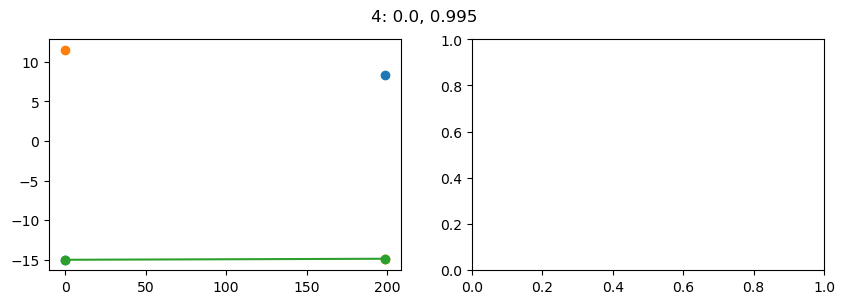

In [26]:
%matplotlib inline
phiAPlot = phiA + musATX * xs[:-1]
phiBPlot = phiB + musBTX * xs[:-1]
x1s = []
x2s = []

for i in range(5):
    x1, x2, y1, y2 = com_tangent(phiAPlot[i], phiBPlot[i], percent=10)
    x1s.append(x1)
    x2s.append(x2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
    fig.suptitle(str(i) + ": " + str(x1/200) + ", " + str(x2/200))

    ax1.plot(phiAPlot[i], 'o-')
    ax1.plot(phiBPlot[i], 'o-')
    ax1.plot([x1, x2], [y1, y2], 'o-')
    # ax1.set_ylim([-20, 0])
    # ax1.set_xlim([-1,25])

    # ax2.plot(phiAPlot[i], 'o-')
    # ax2.plot(phiBPlot[i], 'o-')
    # ax2.plot([x1, x2], [y1, y2], 'o-')
    # ax2.set_ylim([-20, 0])
    # ax2.set_xlim([175,200])

    # plt.figure()
    # plt.plot(phiAPlot[i])
    # plt.plot(phiBPlot[i])
    # plt.title()
    # plt.ylim([-20, 0])
plt.show()

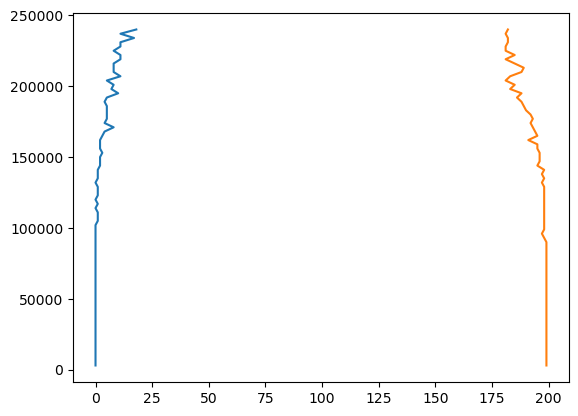

In [8]:
# %matplotlib qt 
upTo = 80
plt.plot(x1s[:upTo], TTs[:upTo])
plt.plot(x2s[:upTo], TTs[:upTo])
plt.show()

In [ ]:
# %matplotlib inline
from drawpd import MF
from ase.db import connect

# from clease.settings import Concentration
# from clease.structgen import NewStructures
# from clease.settings import CEBulk
# from clease.calculator import attach_calculator

# conc = Concentration(basis_elements=[['Au', 'Cu']])

# curr_db_name = "toy-fero.db"
# MCsettings = CEBulk(crystalstructure='sc',
#                   a=3,
#                   supercell_factor=64,
#                   concentration=conc,
#                   db_name=curr_db_name,
#                   max_cluster_dia=[4,4,4],
#                   basis_func_type="polynomial")

gs_db_name = "1.0.db"
db = connect(gs_db_name)
gs05 = None
for row in db.select(""):
    gs05 = row.toatoms()

# with open('toy-fero-eci.json') as f:
#     eci = json.load(f)

# gs05 = attach_calculator(MCsettings, atoms=gs05, eci=eci)
# # gs05.calc = EAM(potential='AuCu_Zhou04.eam.alloy')

# # view(gs05)
# print("gs atom E:", gs05.get_potential_energy())

TInit, TFinal = 3e3, 3.3e5
dT = 3000 # * 1e8
Ts = np.arange(TInit, TFinal+1e-5, dT)
if gs_db_name == "1.0.db":
    muInit, muFinal =  30, -35
    dMu = -100
    mus = np.arange(muInit, muFinal+dMu*1e-5, dMu)
else:
    muInit, muFinal =  -35, 30
    dMu = 100
    mus = np.arange(muInit, muFinal+dMu*1e-5, dMu)

from IsingCalculator import IsingCalc
calc = IsingCalc(E0=0, h=2, J=5, cutoff=3)



mf = MF()
mf.set_gs_atom(gs05, IsingCalc=calc)


# phi_mf = mf.get_phi(T=Ts[0], x = 1, mu=mus[0])
# print("mu =", mus[0], "phi_mf =", phi_mf)

print(mf.get_F(T=Ts[0], x = 1)/64)

mfX1s = []
mfX2s = []

for TT in Ts:
    fMf = []
    for x in xs:
        fMf.append(mf.get_F(T=TT, x=x)/64)
    
    x1tmp, x2tmp, _, _ = com_tangent(fMf, fMf, percent=40)
    mfX1s.append(x1tmp)
    mfX2s.append(x2tmp)
    plt.figure()
    plt.plot(fMf)
    plt.title(str(TT))

# plt.show()

In [10]:
%matplotlib qt 
upTo = 80
plt.plot(mfX1s[:upTo], Ts[:upTo])
plt.plot(np.array(mfX2s[:upTo]), Ts[:upTo])
plt.plot(x1s[:upTo], Ts[:upTo])
plt.plot(x2s[:upTo], Ts[:upTo])
plt.show()

mach_inject_bundle load_bundle_package: /Library/Application Support/MacEnhance/Plugins/AfloatX.bundle


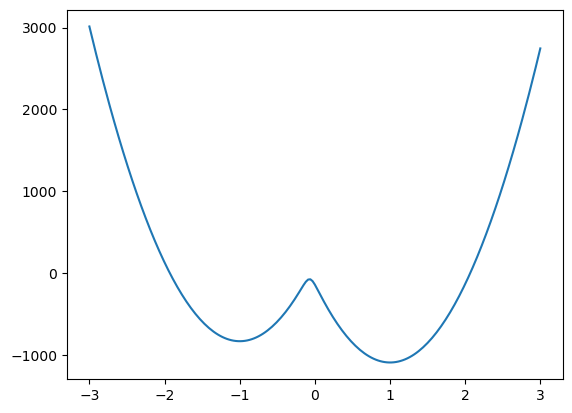

In [10]:
N = 64
q = 3
J = 5
h = 2
kB = 8.617333262e-5
T = 2e4
Tc = 2.269*J/kB

m = np.linspace(-3, 3, 201, endpoint=True)
hEff = h + 2 * J * q * m

F = N * q * J * m**2 - N * kB * T * np.log(2) - N * kB * T * np.log(np.cosh(hEff/kB/T)) - h*m

plt.plot(m, F)
plt.show()

(21, 66)
(21, 66)
(21, 66)


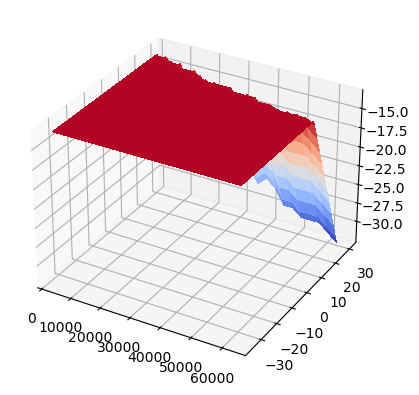

In [8]:
a = np.load("tmp-phiTable-0.0.npy")
# b = np.load("toy-phiTable-0.0-right.npy")
# b = b[:, 0:65]
x = np.load("tmp-XTable-0.0.npy")

TInit, TFinal = 3e3, 63000
muInit, muFinal = -35, 30
dT, dMu = 3000, 1
TTs = np.arange(TInit, TFinal+1e-5, dT)
mus = np.arange(muInit, muFinal+dMu*1e-5, dMu)

# plt.plot(a[20])
# plt.show()


mus, Ts = np.meshgrid(mus, TTs)
# Z = Ts + mus

# a = a + mus*x

print(a.shape)
# print(b.shape)
print(Ts.shape)
print(mus.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Ts, mus, a, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [1]:
def find_intersection(array1, array2):
    set1 = set(array1)
    set2 = set(array2)

    intersection = set1.intersection(set2)

    return list(intersection)

# Example usage
array1 = [-2, -1, 1, 2]
array2 = [2, 1, -1, -2]

result = find_intersection(array1, array2)
print("Intersection:", result)

Intersection: [1, 2, -1, -2]


In [75]:
import numpy as np
array1 = np.array([-2, -1, 1, 2])
array2 = np.array([2, 1, -1, -2])
mus = np.arange(4)+2

tmp = ((array1 - array2)>0)*2-1
tmp = np.argmin(tmp[1:]*tmp[:-1])
interPoint = [tmp, tmp+1]

f1 = np.polyfit(mus[interPoint], array1[interPoint], 1)
f2 = np.polyfit(mus[interPoint], array2[interPoint], 1)
intersection = np.roots(f1 - f2)[0]

array3Y = np.flip(np.array([-1,3,1,2.5,0,4,-10]))
array3X = np.flip(np.array([-1,0,1,2.5,3,4,5]))
tmp = ((array3X - intersection)>0)*2-1
tmp = np.argmin(tmp[1:]*tmp[:-1])

z = np.polyfit(array3X[[tmp, tmp+1]], array3Y[[tmp, tmp+1]], 1)
p = np.poly1d(z)
p(intersection)


1.9999999999999982

In [71]:
intersection


2.4999999999999996

In [67]:
array3Y = np.array([-1,3,1,2.5,0,4,-10])
array3X = np.array([-1,0,1,2.5,3,4,5])
tmp = ((array3X - intersection)>0)*2-1
tmp = np.argmin(tmp[1:]*tmp[:-1])

z = np.polyfit(array3X[[tmp, tmp+1]], array3Y[[tmp, tmp+1]], 1)
p = np.poly1d(z)
p(intersection)



1.9999999999999996

In [55]:
db = connect("/Users/Michael_wang/Documents/venkat/mint-PD/PhaseDiagram-Clease/LiMg/LiMg-Jun27-bcc.db")

In [56]:
db.delete(range(77,152))

In [49]:
x = []
E = []

for row in db.select('struct_type=final'):
    atoms = row.toatoms()
    x.append(np.sum(atoms.numbers == 3)/len(atoms))
    E.append(atoms.get_potential_energy()/len(atoms))

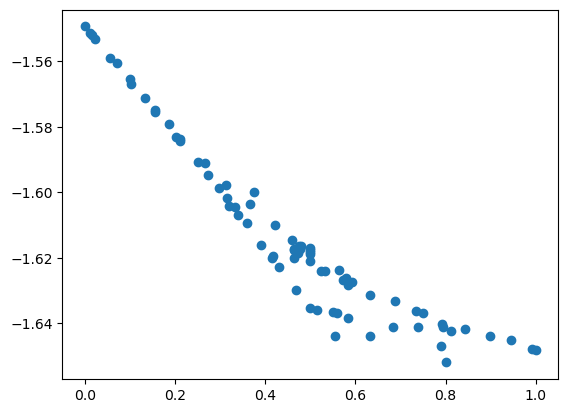

In [50]:
plt.plot(x, E, 'o')
# plt.ylim([np.min(E)-1, -198])